# Problem - Wine Dataset for Clustering

## Clustering Task

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Get the Data

In [3]:
# downloaded from kaggle

## Take a quick look at Data

In [4]:
df = pd.read_csv("wine-clustering.csv")

In [5]:
df.shape

(178, 13)

In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

### Attributes
Alcohol: The alcohol content in the wine (percent/volume)

Malic Acid: A type of acid found in wine that contributes to its tartness

Ash: The mineral content left after burning the wine, indicating mineral levels

Alcalinity of Ash: The alkalinity level of the ash, reflecting the pH balance

Magnesium: The magnesium content in the wine

Total Phenols: A measure of the phenolic compounds, contributing to flavor and color

Flavanoids: A specific type of phenol responsible for bitterness and antioxidant properties

Nonflavanoid Phenols: Phenols not related to flavanoids, affecting the wine's structure

Proanthocyanins: Compounds contributing to the color intensity and astringency of wine

Color Intensity: The depth of color in the wine

Hue: The shade or tint of the wine’s color

OD280/OD315 of Diluted Wines: A measure of wine’s protein and polyphenol content

Proline: An amino acid that correlates with the wine's quality

In [7]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
# check for missing values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [12]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

# Discovering & Visualizing Data

## Visualize Data

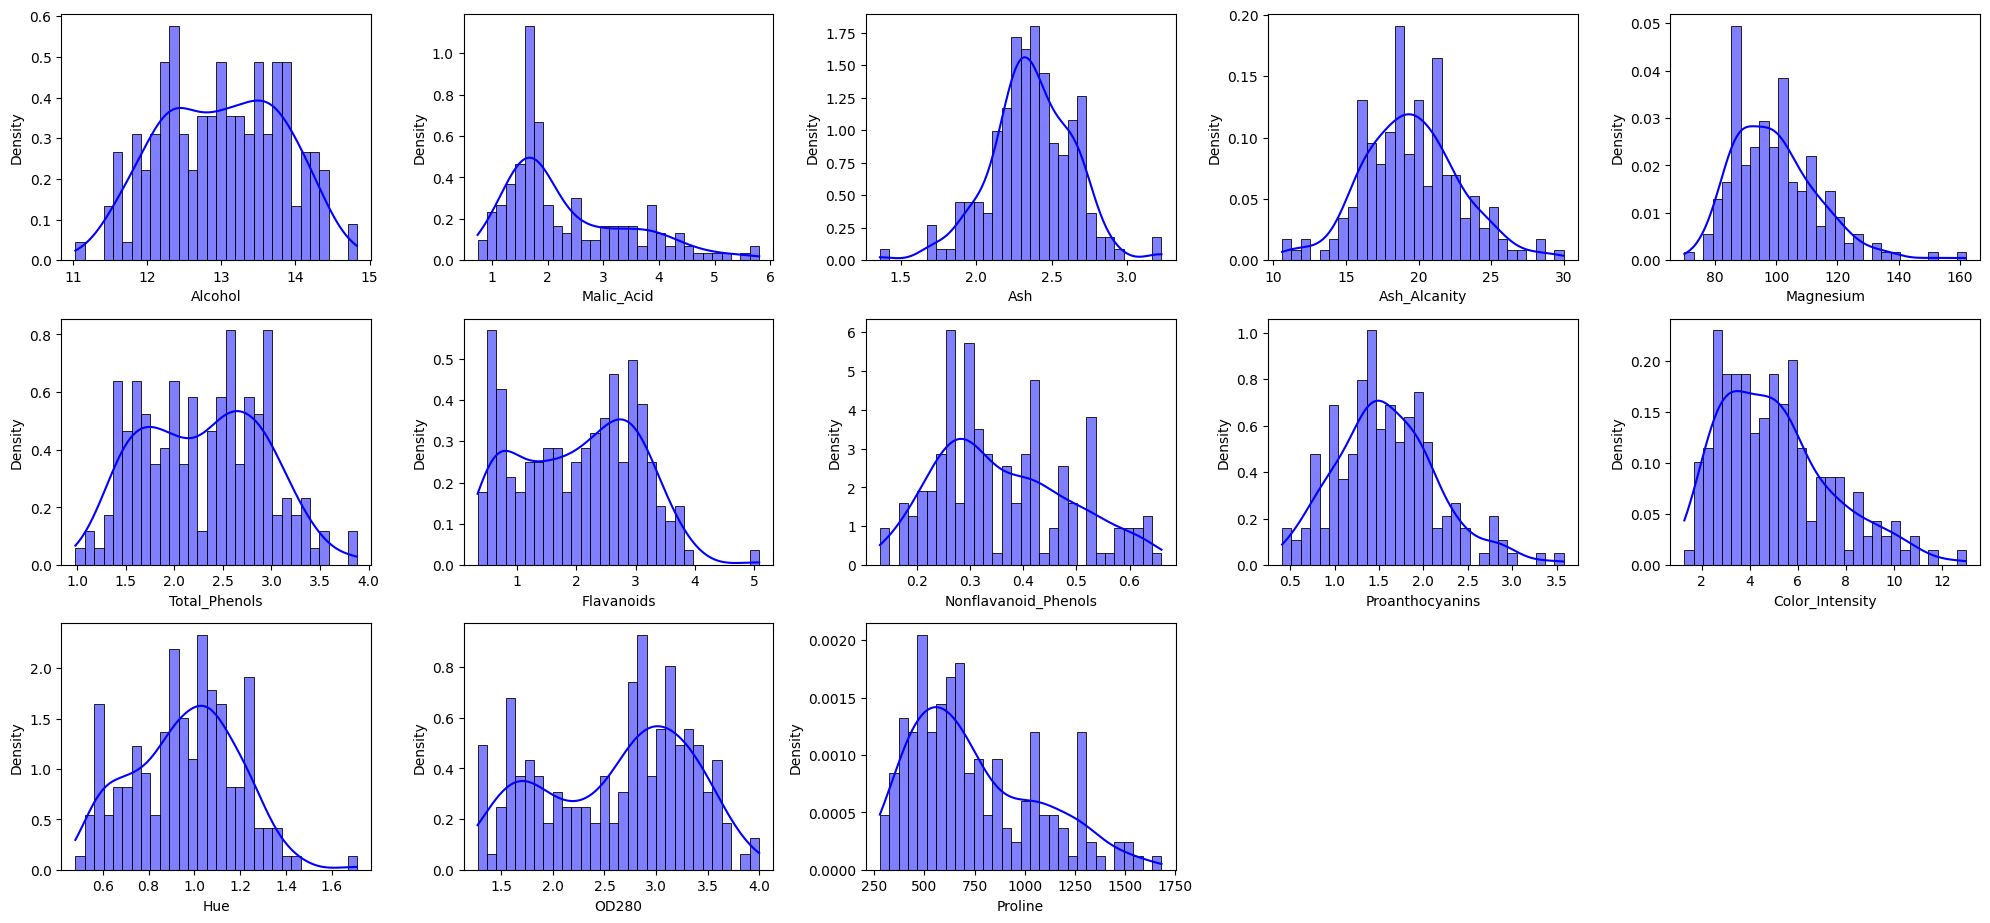

In [13]:
import scipy.stats as stats

plt.figure(figsize=(20, 15))
columns = df.columns

# Plot histogram for each attribute
for i, col in enumerate(columns):
    plt.subplot(5, 5, i + 1)  
    sns.histplot(df[col], kde=True, stat="density", color='blue', bins=30)

plt.tight_layout()
plt.show()

## Looking for Correlations

In [14]:
# pearson's correlation
corr_matrix = df.corr()
corr_matrix

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

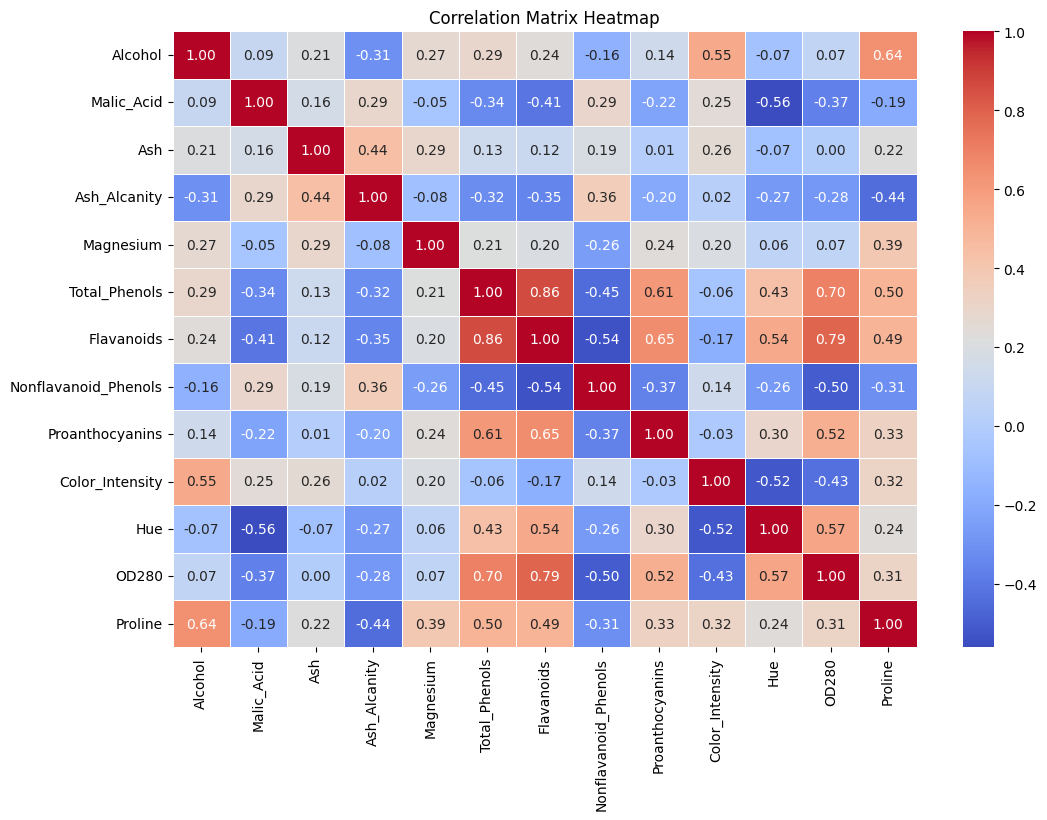

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Figure size 1500x1500 with 0 Axes>

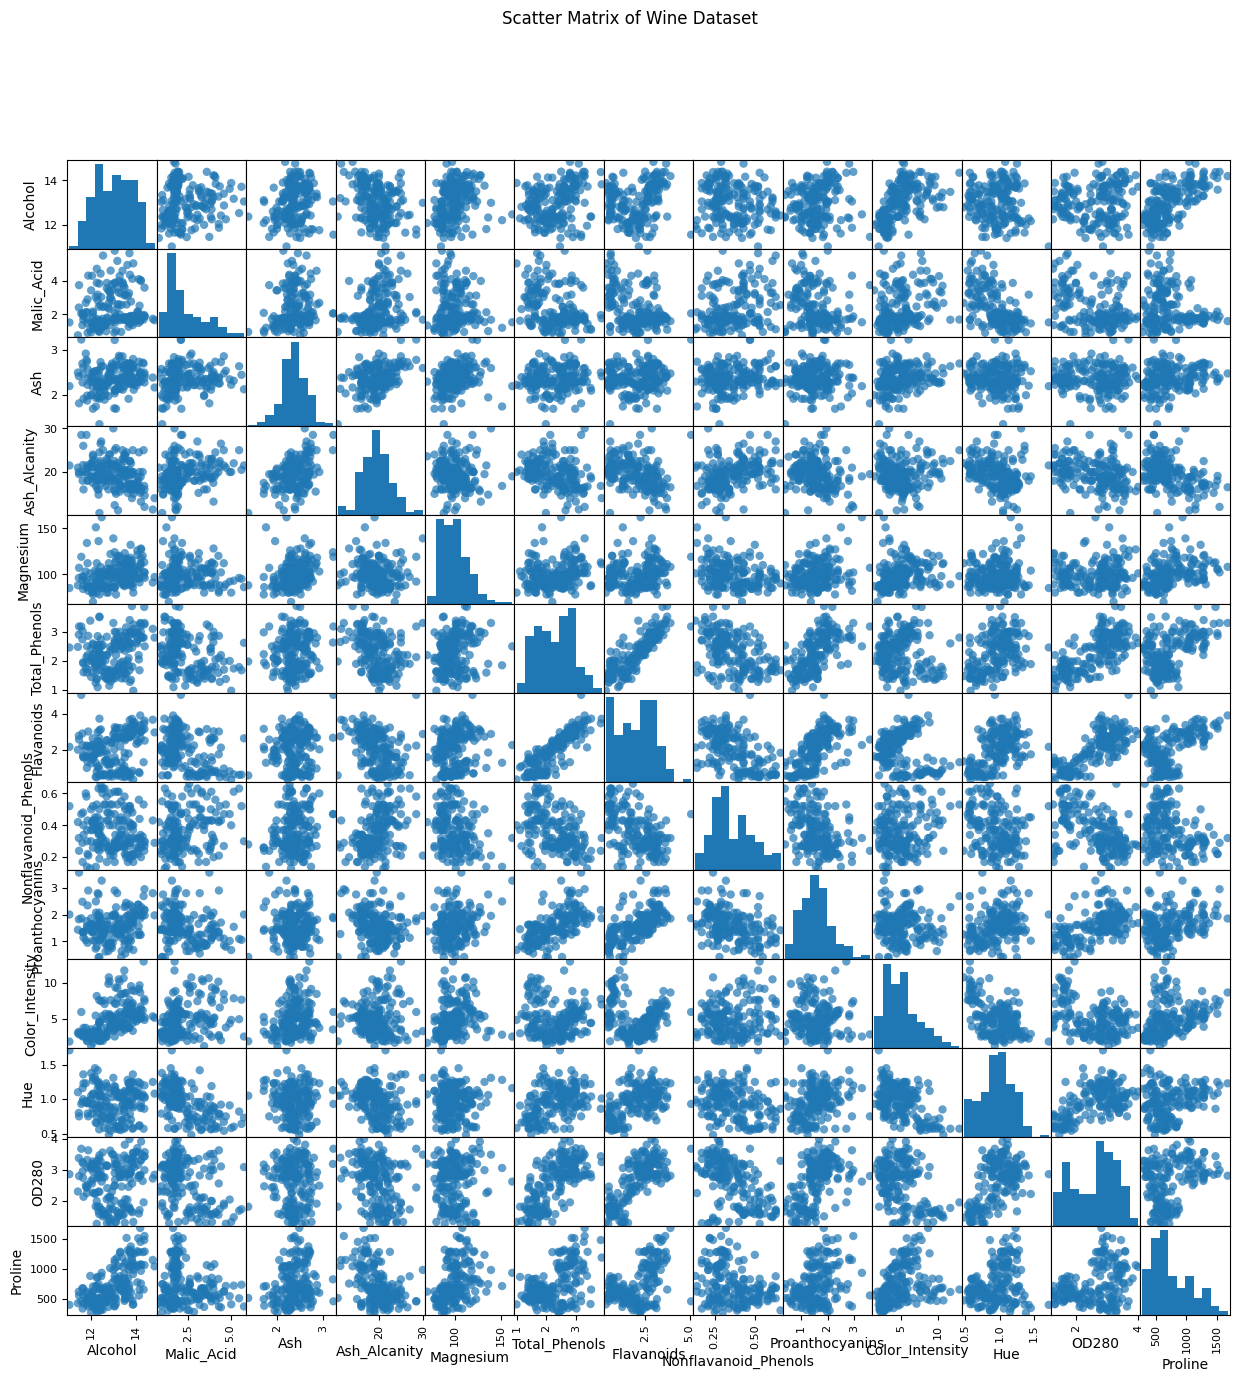

In [16]:
from pandas.plotting import scatter_matrix

# Plot scatter matrix
plt.figure(figsize=(15, 15))
scatter_matrix(df, figsize=(15, 15), marker='o', alpha=0.7)
plt.suptitle('Scatter Matrix of Wine Dataset')
plt.show()

# Prepare Data for ML Algorithm

In [17]:
# no data cleaning step here

## Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

## Create Dataset

In [19]:
X = df.copy()
X_train = pipeline.fit_transform(X)

# ML Algorithms

## Lets reduce its dimensions to visualize

### PCA

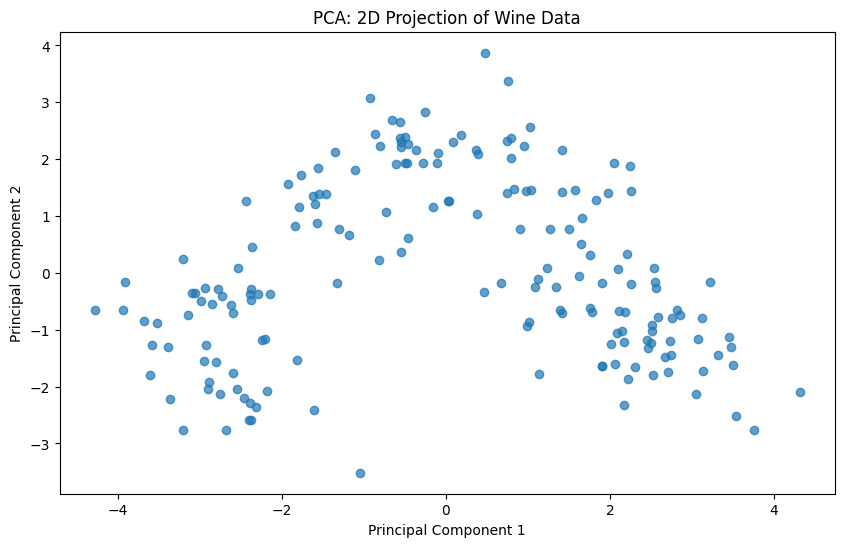

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot
plt.figure(figsize=(10, 6))
plt.title('PCA: 2D Projection of Wine Data')
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### LLE

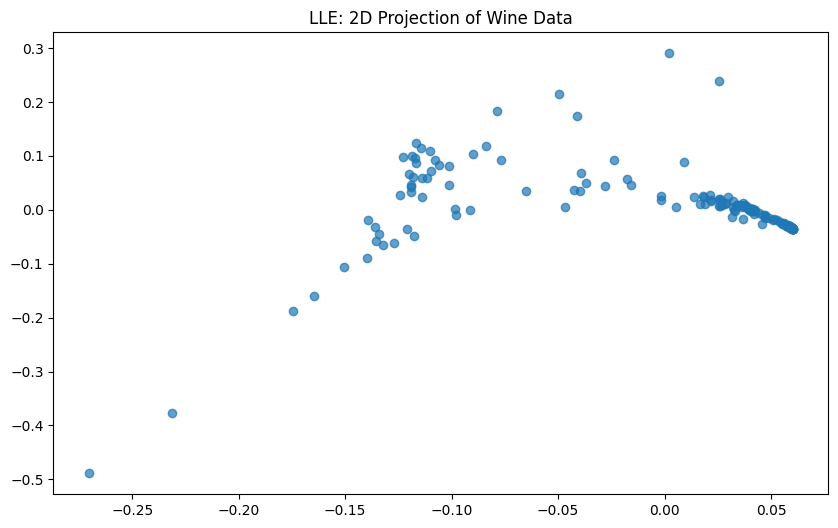

In [21]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_train)

# Plot
plt.figure(figsize=(10, 6))
plt.title('LLE: 2D Projection of Wine Data')
plt.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.7)
plt.show()

### Random Projections

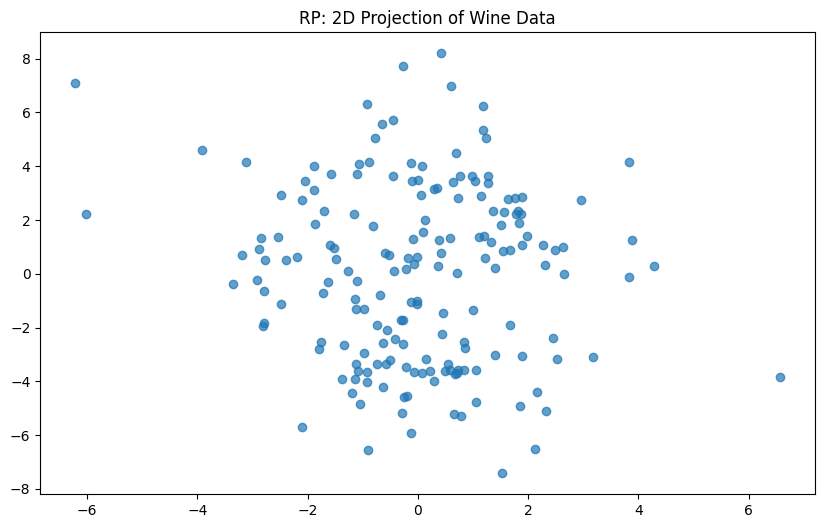

In [22]:
from sklearn.random_projection import GaussianRandomProjection

rp = GaussianRandomProjection(n_components=2, random_state=42)
X_rp = rp.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.title('RP: 2D Projection of Wine Data')
plt.scatter(X_rp[:, 0], X_rp[:, 1], alpha=0.7)
plt.show()

In [23]:
# this is clustering all data into middle
# as one big cluster

### MDS

c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


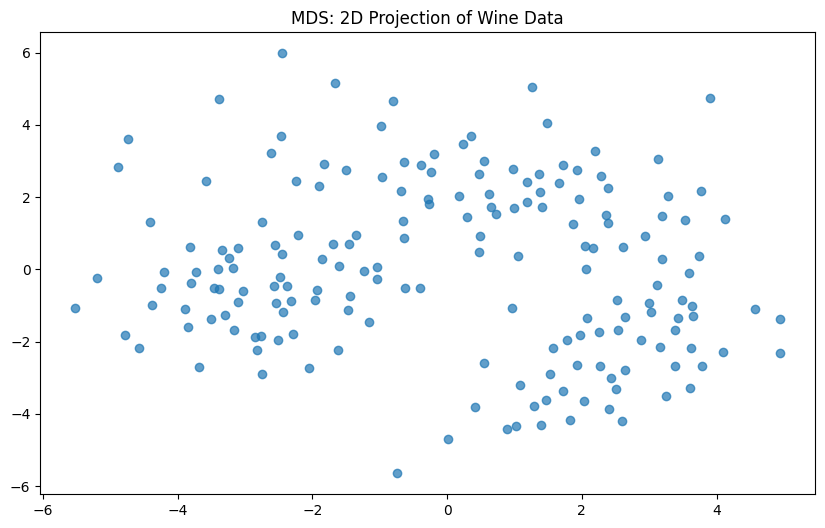

In [24]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.title('MDS: 2D Projection of Wine Data')
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7)
plt.show()

In [25]:
# it looks we have two clusters here

### t-SNE

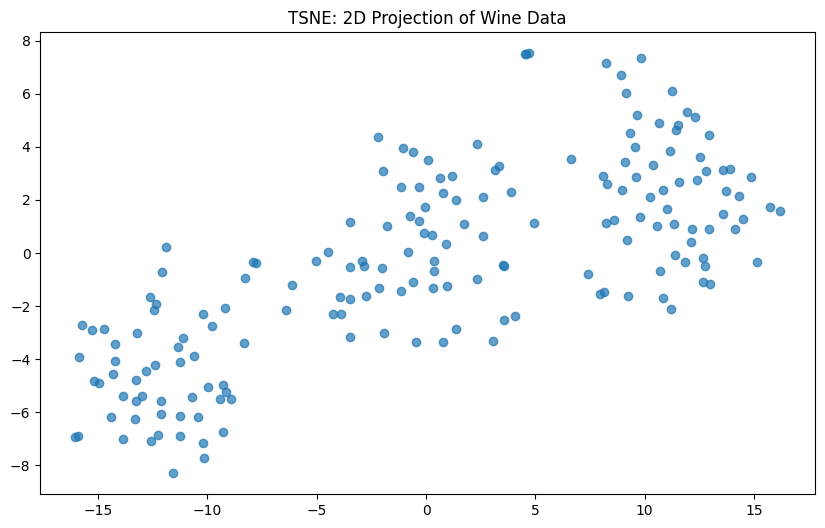

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.title('TSNE: 2D Projection of Wine Data')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.show()

In [27]:
# we can see 3 clusters here clealy

### Isomap

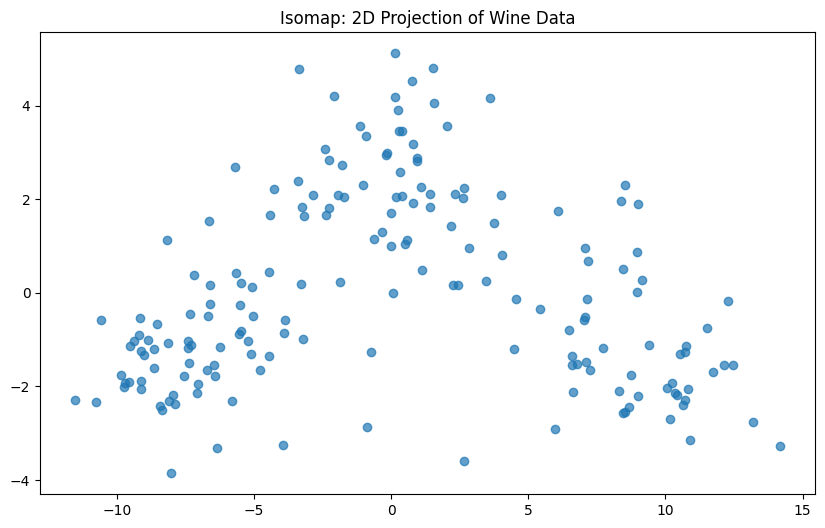

In [28]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.title('Isomap: 2D Projection of Wine Data')
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], alpha=0.7)
plt.show()

## Now, lets do Clustering

In [29]:
import warnings
warnings.filterwarnings('ignore')

### K-Means

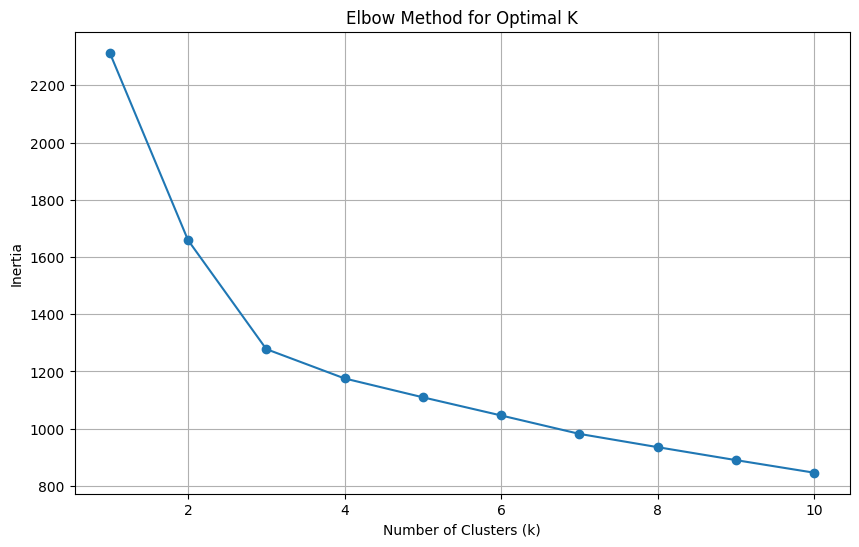

In [30]:
# elbow method to find k
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    inertias.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [31]:
# we can see elbow is at 3
# we can use silhoutte score for accurate determination

In [32]:
km = KMeans(n_clusters=3, n_init='auto')

km.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

In [33]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

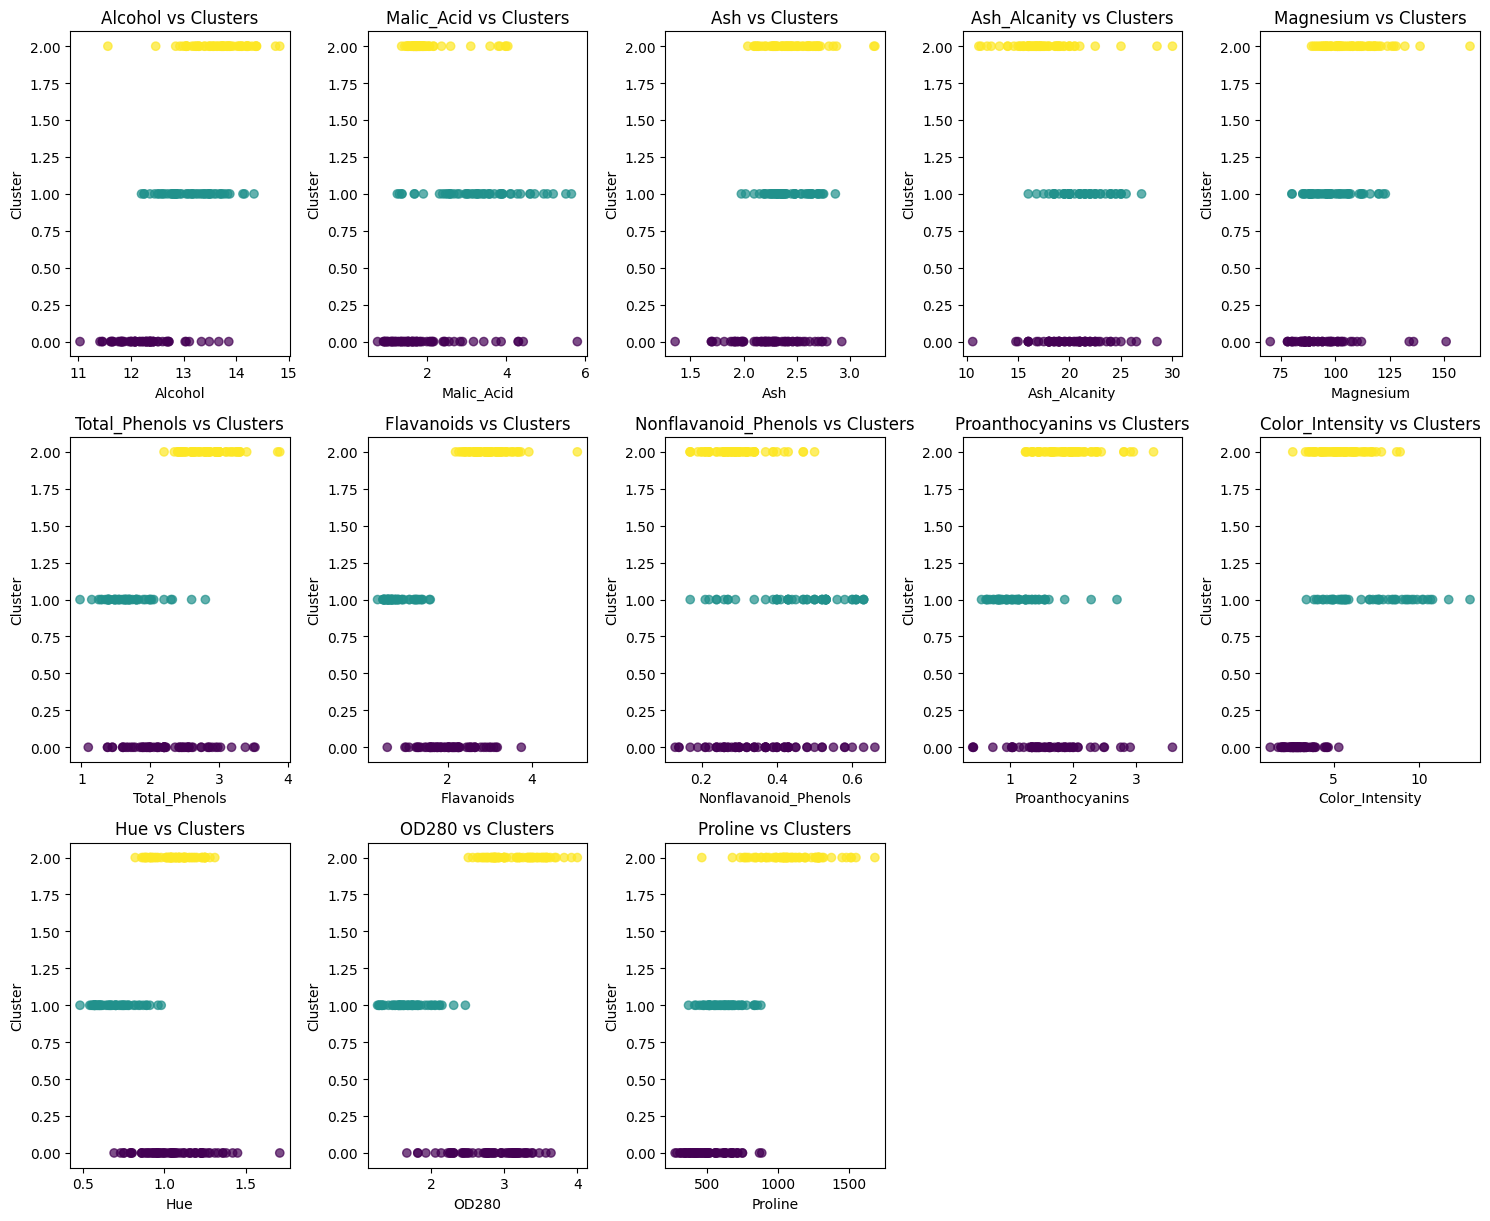

In [34]:
labels = km.labels_

# Plot each feature against cluster labels
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    plt.scatter(df[col], labels, c=labels, cmap='viridis', alpha=0.7)
    plt.title(f'{col} vs Clusters')
    plt.xlabel(col)
    plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

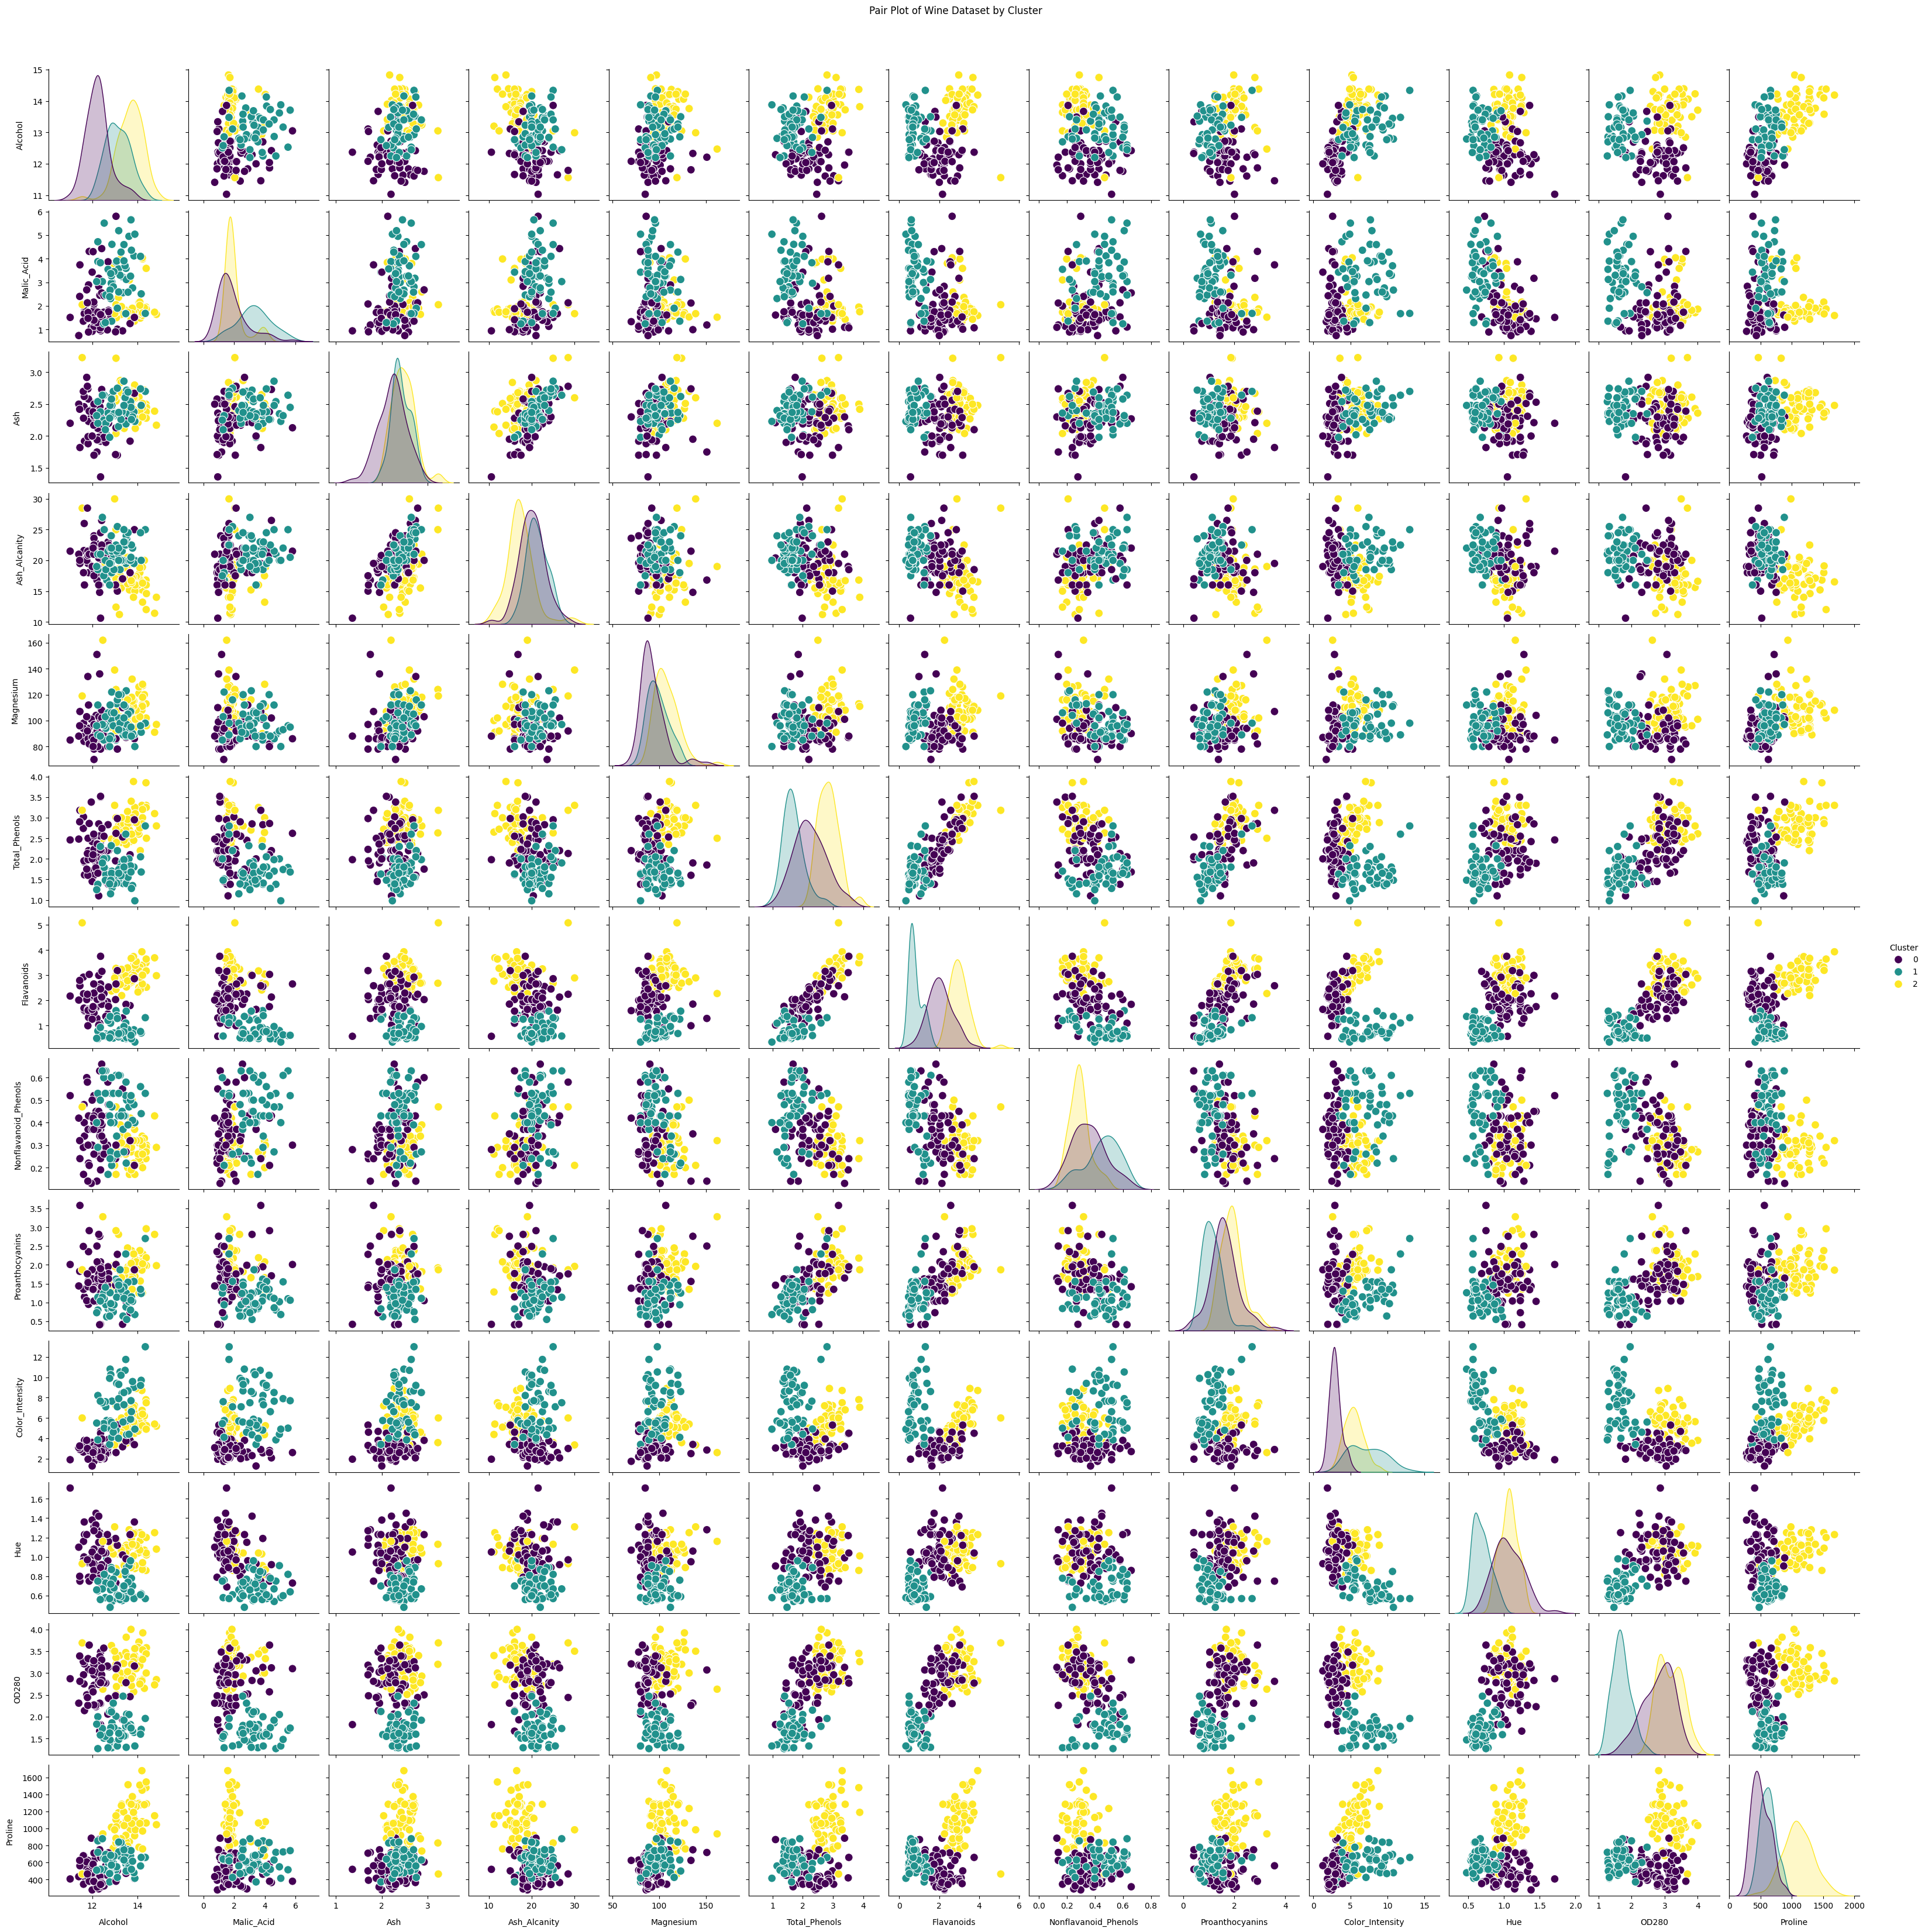

In [35]:
# Add cluster labels to the dataframe
df['Cluster'] = km.labels_

# Create pair plot
pair_plot = sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})

# Add labels to each axis
for ax in pair_plot.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=10, labelpad=10)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10, labelpad=10)

pair_plot.fig.suptitle('Pair Plot of Wine Dataset by Cluster', y=1.02)
plt.show()

In [36]:
df.drop(['Cluster'], axis=1, inplace=True)

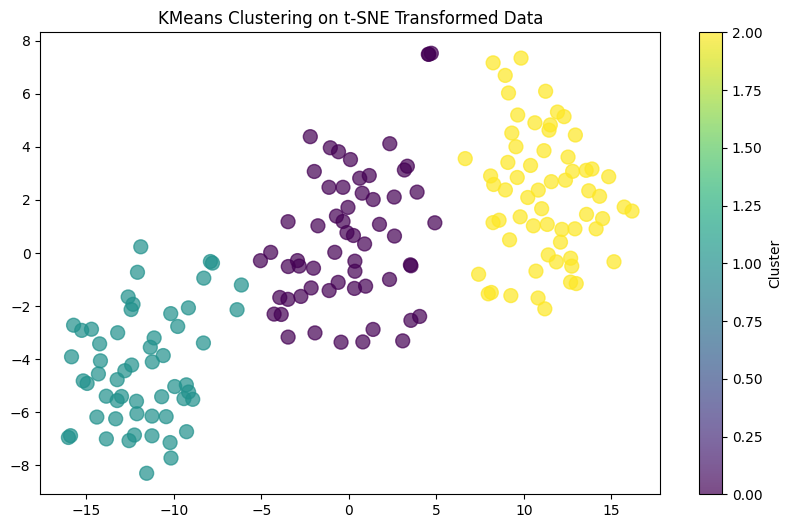

In [37]:
# t-SNE + K-means
km_tsne = KMeans(n_clusters=3, n_init='auto', random_state=42)
y_tsne_clusters = km_tsne.fit_predict(X_tsne)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tsne_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering on t-SNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

### DBSCAN

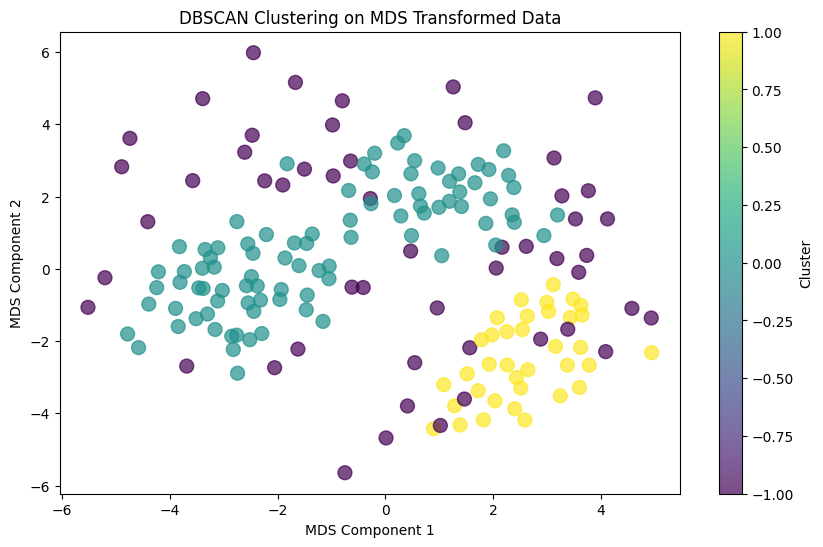

Number of clusters found: 2


In [38]:
from sklearn.cluster import DBSCAN

# Adjusted DBSCAN with smaller eps
dbscan = DBSCAN(eps=2.3, min_samples=7)
y_dbscan_clusters = dbscan.fit_predict(X_train)

# Visualize clusters using MDS
plt.figure(figsize=(10, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_dbscan_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering on MDS Transformed Data')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Cluster')
plt.show()

n_clusters = len(set(y_dbscan_clusters)) - (1 if -1 in y_dbscan_clusters else 0)
print("Number of clusters found:", n_clusters)

In [39]:
# these are not so good

### Agglomerative Clustering

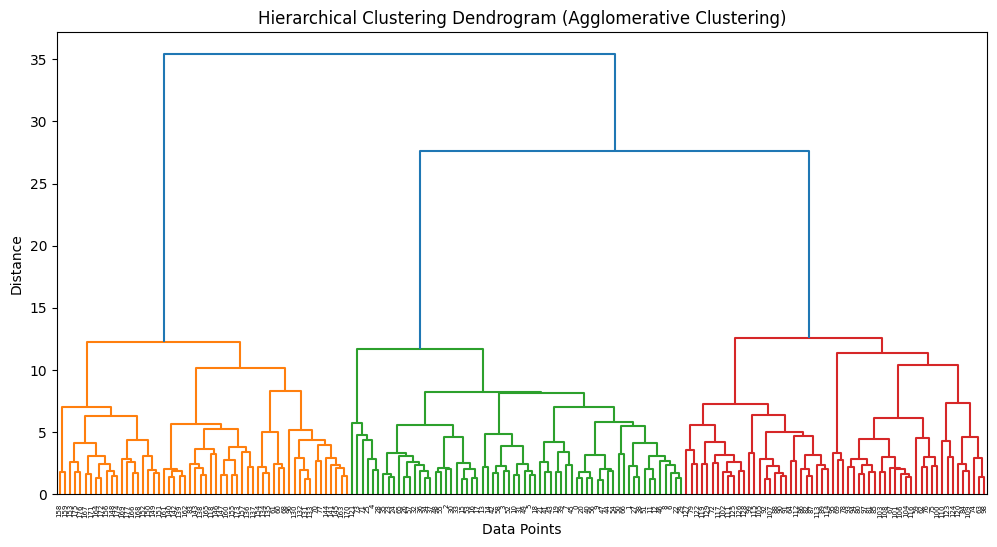

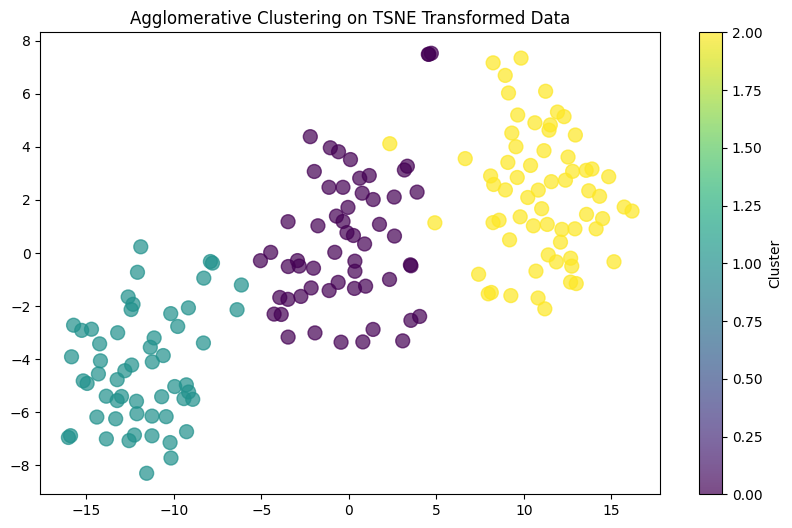

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute linkage matrix
linkage_matrix = linkage(X_train, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Agglomerative Clustering)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering with 2-3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg_clusters = agg_clustering.fit_predict(X_train)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_agg_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Agglomerative Clustering on TSNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()


In [41]:
# this looks good

### BIRCH

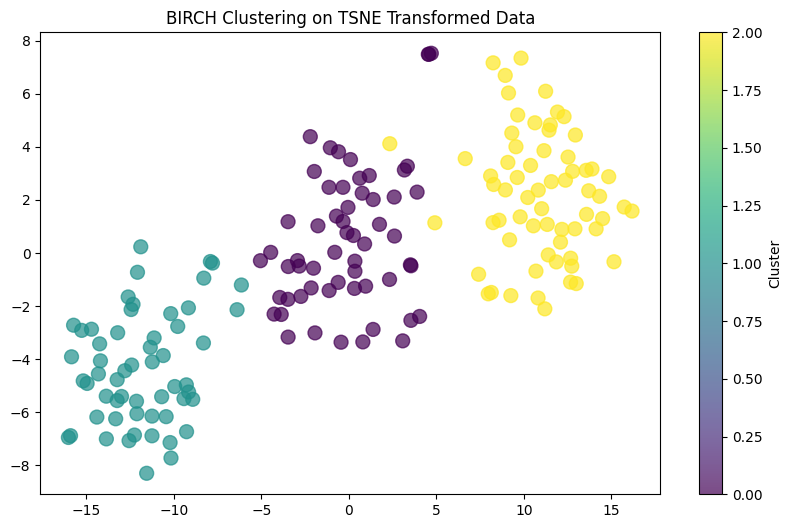

In [42]:
from sklearn.cluster import Birch

# Fit BIRCH clustering model
birch = Birch(n_clusters=3)
y_birch_clusters = birch.fit_predict(X_train)

# Visualize clusters using TSNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_birch_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('BIRCH Clustering on TSNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

In [43]:
# this also looks good

### Affinity Propagation

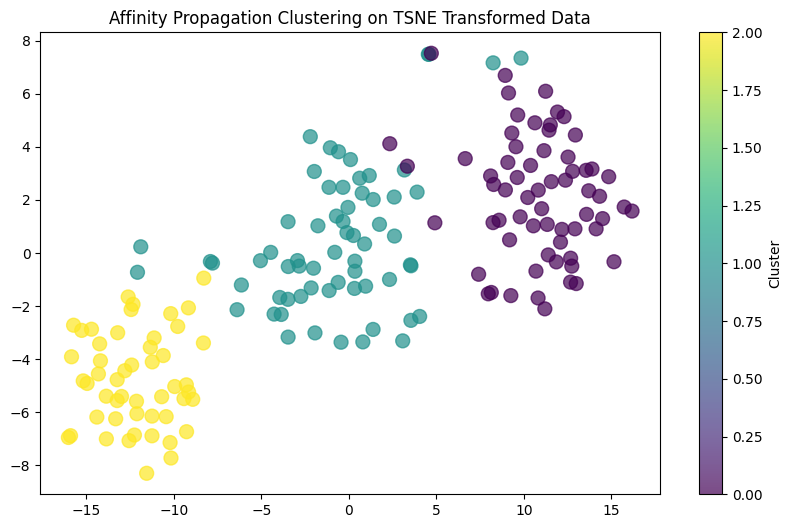

In [44]:
from sklearn.cluster import AffinityPropagation

aff_prop = AffinityPropagation(damping=0.5, preference=-250, random_state=42)
y_aff_prop_clusters = aff_prop.fit_predict(X_train)

# Visualize clusters using TSNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_aff_prop_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Affinity Propagation Clustering on TSNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# this looks fine

### Spectral Clustering

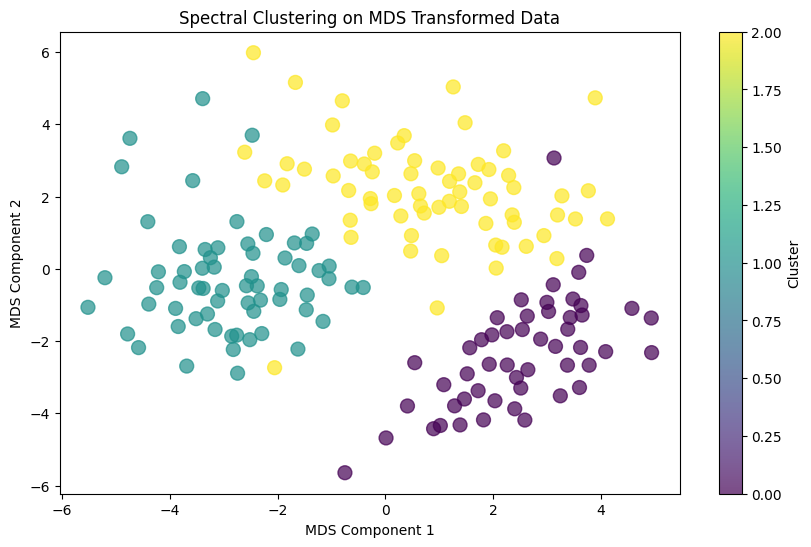

In [46]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral_clusters = spectral.fit_predict(X_train)

# Visualize clusters using MDS
plt.figure(figsize=(10, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_spectral_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Spectral Clustering on MDS Transformed Data')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [47]:
# this fits MDS well

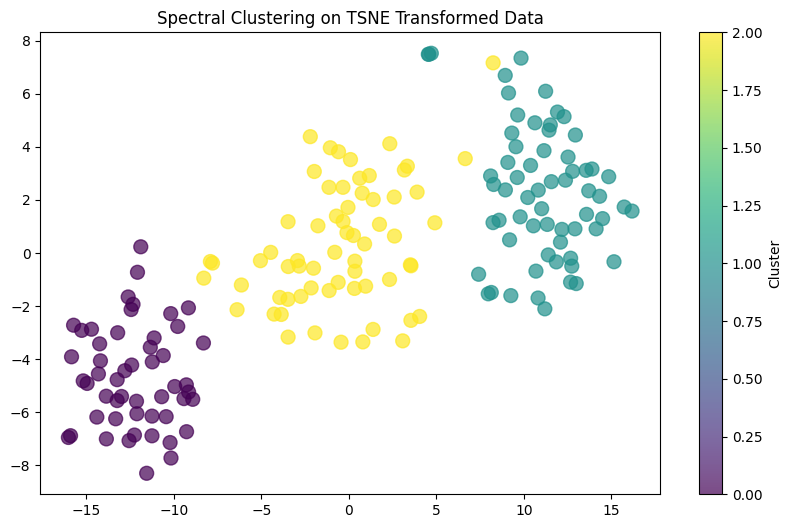

In [48]:
# Visualize clusters using TSNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_spectral_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Spectral Clustering on TSNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

In [49]:
# this fits TSNE well too

## Lets try guassian mixture

### Guassain Mixture

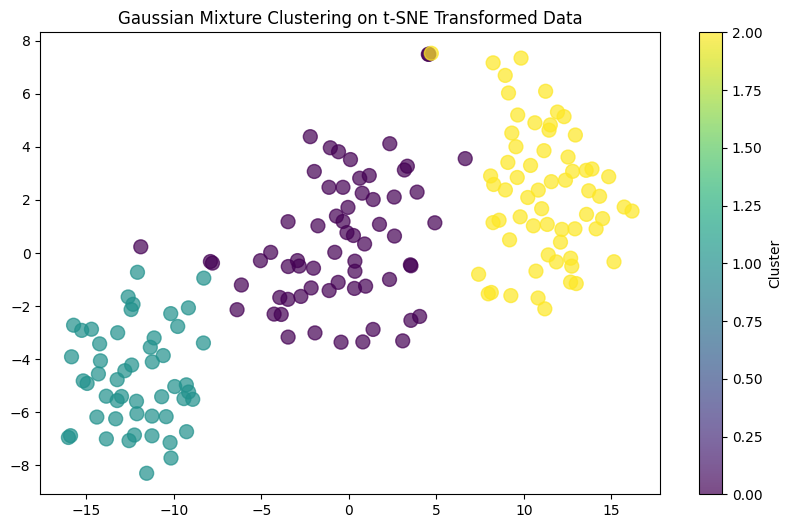

In [50]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm_clusters = gmm.fit_predict(X_train)

# Visualize clusters using t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_gmm_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Gaussian Mixture Clustering on t-SNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

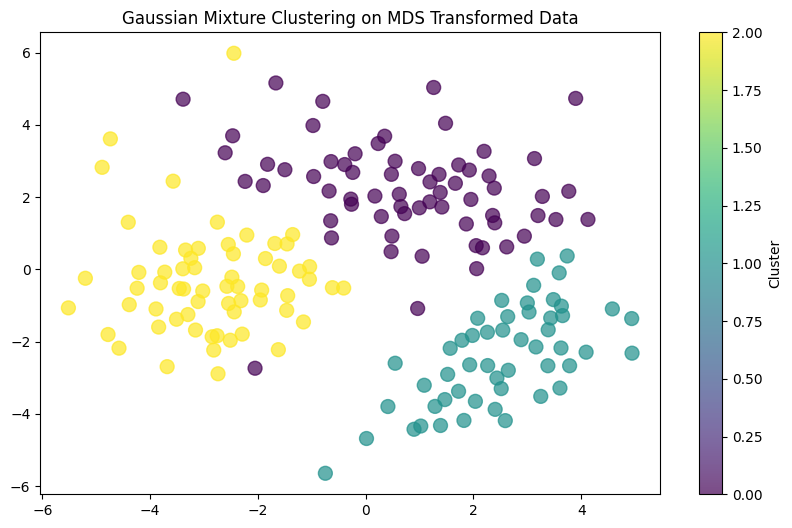

In [52]:
# Visualize clusters using MDS
plt.figure(figsize=(10, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_gmm_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Gaussian Mixture Clustering on MDS Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

In [53]:
# this looks good too

### Bayesian Guassian Mixture

In [61]:
from sklearn.mixture import BayesianGaussianMixture

bgmm = BayesianGaussianMixture(n_components=5, covariance_type='full', max_iter=1000, random_state=42)
bgmm.fit(X_train)

labels = bgmm.predict(X_train)

In [62]:
bgmm.weights_

array([0.15138164, 0.27192949, 0.06589557, 0.23896275, 0.27183055])

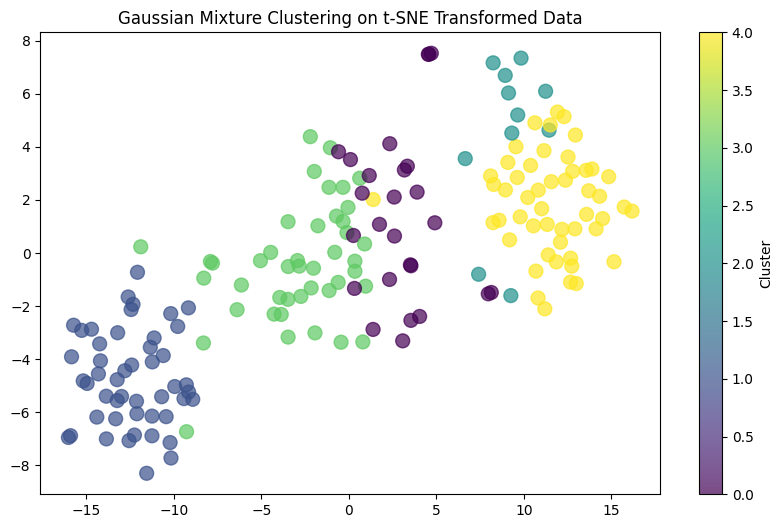

In [63]:
y_bgmm_clusters = bgmm.predict(X_train)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_bgmm_clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Gaussian Mixture Clustering on t-SNE Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

In [60]:
# this doen't look so good